<a href="https://colab.research.google.com/github/seyoung911/ClearWater/blob/master/assignment03.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


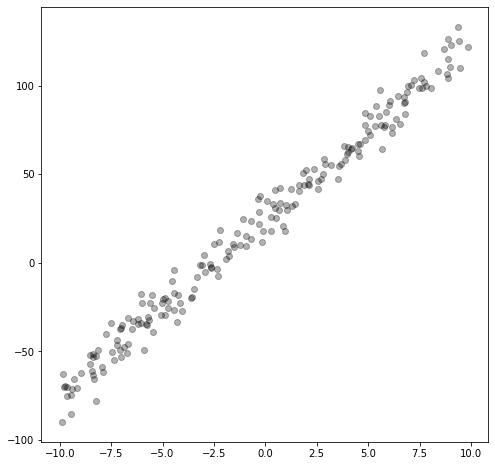

In [0]:

#j 1.Data csv 파일 로드하기
#데이터 경로 /content/drive/My Drive/Colab Notebooks/data.csv
import numpy as np
import matplotlib.pyplot as plt

path = "/content/drive/My Drive/Colab Notebooks/data.csv"#구글 드라이브에서 마운트한 데이터파일 경로
data = np.genfromtxt(path, delimiter = ',')

x_data = data[:, 0]
y_data = data[:, 1]

plt.figure(figsize = (8,8))
plt.scatter(x_data, y_data, c = 'k', alpha = 0.3)
plt.show()